### 1) Introduction

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("column_2C_weka.csv")

In [3]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


### 2) Visualization

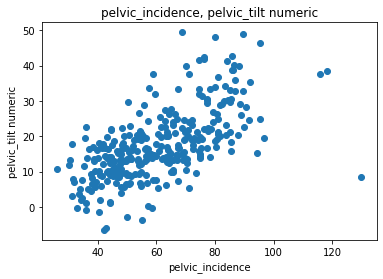

In [4]:
plt.scatter(data["pelvic_incidence"], data["pelvic_tilt numeric"])
plt.xlabel("pelvic_incidence")
plt.ylabel("pelvic_tilt numeric")
plt.title("pelvic_incidence, pelvic_tilt numeric")
plt.show()

### 3) Clustering Algorithms

#### 3.1. KMeans Algorithms

- find k value

In [5]:
data2 = data.loc[:,['pelvic_radius','degree_spondylolisthesis']]
data3 = data.drop('class',axis = 1)

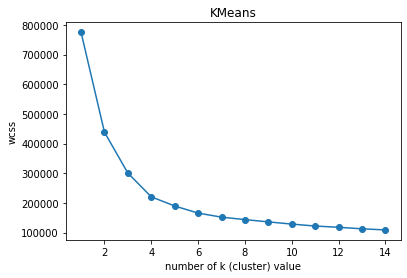

In [6]:
from cv2 import kmeans
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 15):
    kmean = KMeans(n_clusters = i)
    kmean.fit(data3)
    wcss.append(kmean.inertia_)

plt.plot(range(1, 15), wcss, "-o")
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.title("KMeans")
plt.show()

- n = 2 için

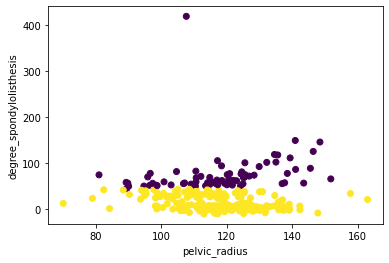

In [7]:
kmeans2 = KMeans(n_clusters = 2)
kmeans2.fit(data2)

cluster = kmeans2.predict(data2)
data2["label"] = cluster

plt.scatter(data2['pelvic_radius'], data2['degree_spondylolisthesis'], c = data2["label"])
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()

- Visualization

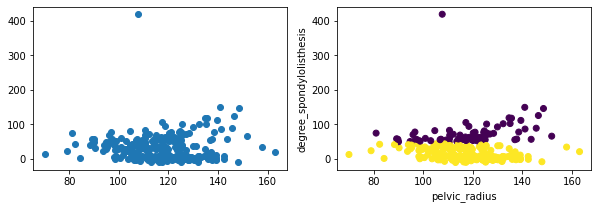

In [8]:
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.scatter(data2['pelvic_radius'], data2['degree_spondylolisthesis'])
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')

ax2.scatter(data2['pelvic_radius'], data2['degree_spondylolisthesis'], c = data2["label"])
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()

#### 3.2. Hierarchy Clustering

#### Dendogram

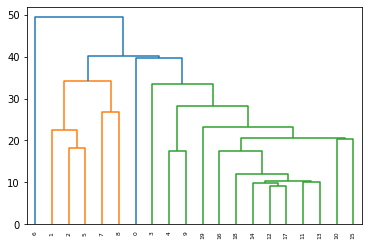

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(data3.iloc[200:220,:], method = "single")
dendrogram(merg, leaf_rotation = 90, leaf_font_size = 6)
plt.show()

#### HC

In [10]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_clustering = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
clustering = hierarchical_clustering.fit_predict(data3)

data3["label"] = clustering

In [11]:
color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:,'class']]

In [12]:
data3.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,label
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


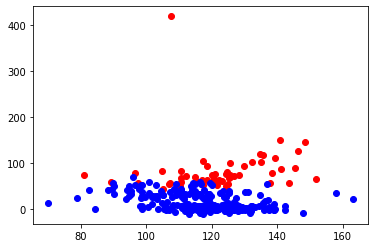

In [13]:
plt.scatter(data3.pelvic_radius[data3.label == 0], data3.degree_spondylolisthesis[data3.label == 0], color = "red")
plt.scatter(data3.pelvic_radius[data3.label == 1], data3.degree_spondylolisthesis[data3.label == 1], color = "blue")
plt.show()

#### T - Distributed Stochastic Neighbor Embedding (T - SNE)

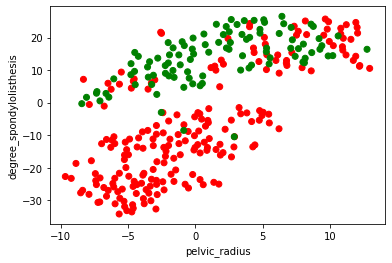

In [14]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)
transformed = model.fit_transform(data3)
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x,y,c = color_list )
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()